# Equaliy weighted

In [3]:
# os related
from pathlib import Path
import os 

# data related
import pandas as pd
import datetime as dt
import numpy as np


# visual related
import matplotlib.pyplot as plt
# time related

In [105]:
# Input: tableau stock déjà préselectioné 
# Output: tableau de rendement et tableau de risk 
def equaly_weighted(df, weeks=12):
    no_assets = len(df.columns)
    weights = [1/no_assets for i in range(no_assets)]
    #ret est le tableau de rendement 
    ret = df.pct_change().dropna()
    
    #Commande pour trouver rendement 2 possibilités 
    #ret_mean = ret.mean(axis=1)
    ret_week = ret.mul(weights, axis="columns").sum(axis=1)
    
    # Find the average of each 12 weeks
    df_summary_mean = pd.DataFrame(index = range(len(ret_week)//12), columns = df.columns)
    df_summary_std = pd.DataFrame(index = range(len(ret_week)//12), columns = df.columns)
    out_tab_mean = [0]*(len(ret_week)//12)
    out_tab_std = [0]*(len(ret_week)//12)

    for i in range(len(ret_week)//12):
        out_tab_mean[i] = ret_week.iloc[i*12:(i+1)*12].mean()                 #portofolio mean
        df_summary_mean.iloc[i] = ret.iloc[i*12 : (i+1)*12].mean()            #stock mean
        out_tab_std[i] = ret_week.iloc[i*12:(i+1)*12].std()
        df_summary_std.iloc[i] = ret.iloc[i*12 : (i+1)*12].std()
    df_summary_mean["ewp_rendement"] = out_tab_mean
    df_summary_std["ewp_risk"] = out_tab_std
    
    return df_summary_mean, df_summary_std 
    

In [4]:
PROJECT_PATH = Path(os.getcwd()).parent

In [9]:
RAW_DATA = PROJECT_PATH / "PROC_DATA" 

In [10]:
CSV_FILE = RAW_DATA / "stock_2000.csv"

In [13]:
df = pd.read_csv(CSV_FILE)

In [17]:
df["timestamp"] = df["timestamp"].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d"))

In [19]:
df.set_index("timestamp", inplace=True)

In [21]:
no_assets = len(df.columns)

In [22]:
no_assets

381

In [24]:
weights = [1/no_assets for i in range(no_assets)]

In [42]:
ret = df.pct_change().dropna()

In [52]:
# c'est la m^me chose
ret_mean = ret.mean(axis=1)
ret_week = ret.mul(weights, axis="columns").sum(axis=1)

In [61]:
tamp_ret_week = ret_week.iloc[:-8]

In [65]:
# Next step 
# Find the average of each 12 weeks 
out_tab = [0]*(len(tamp_ret_week)//12)
for i in range(len(tamp_ret_week)//12):
     out_tab[i] = ret_week.iloc[i*12:(i+1)*12].mean()

In [96]:
# Rendement
df_summary = pd.DataFrame(index = range(len(tamp_ret_week)//12), columns = df.columns)

In [97]:
out_tab = [0]*(len(tamp_ret_week)//12)

for i in range(len(tamp_ret_week)//12):
    out_tab[i] = ret_week.iloc[i*12:(i+1)*12].mean()
    df_summary.iloc[i] = ret.iloc[i*12 : (i+1)*12].mean()
df_summary["ewp_rendement"] = out_tab
    

In [98]:
# Std 
df_summary_std = pd.DataFrame(index = range(len(tamp_ret_week)//12), columns = df.columns)

In [99]:
out_tab = [0]*(len(tamp_ret_week)//12)

for i in range(len(tamp_ret_week)//12):
    out_tab[i] = ret_week.iloc[i*12:(i+1)*12].std()
    df_summary_std.iloc[i] = ret.iloc[i*12 : (i+1)*12].std()
df_summary_std["ewp_risk"] = out_tab

In [91]:
df_summary

,aapl,msft,amzn,jpm,jnj,wmt,bac,pg,xom,dis,...,slg,amg,fls,hp,mac,pwr,unm,brk/b,viab,ewp
0,0.029816,-0.004497,-0.006536,0.025884,-0.01508,-0.010523,0.016577,-0.042947,0.000828,0.024158,...,0.010842,0.028537,-0.016503,0.030102,0.003464,0.068071,-0.042651,0.001401,0.005713,0.008834
1,-0.022976,-0.024169,-0.030561,-0.021016,0.018138,0.00315,-0.005947,-0.00099,0.008461,0.002394,...,0.008762,-0.005756,0.018339,0.022238,0.010586,0.037354,0.030691,0.010446,0.017372,0.005151
2,0.013675,-0.006814,0.003315,0.014308,0.008346,0.001698,0.015499,0.012608,0.003291,-0.005636,...,0.005219,0.031793,0.013349,0.005576,0.001604,-0.017355,0.014185,0.003282,-0.004389,0.008282
3,-0.077191,-0.007005,-0.028053,-0.02106,0.003174,0.003202,-0.022971,0.013733,0.003437,-0.016486,...,0.004318,-0.011553,0.012739,-0.014005,-0.007628,-0.013127,0.015505,0.012113,-0.00813,0.001614
4,0.014904,0.005147,-0.053529,0.014021,-0.002432,-0.005676,0.019826,-0.001813,-0.00513,0.002162,...,0.000101,0.00769,0.003813,0.045883,0.008741,-0.015436,-0.000663,0.007302,-0.001314,0.003097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.008564,0.001038,-0.010543,-0.003433,0.00624,0.0059,-0.008405,0.010182,0.000381,0.003419,...,-0.006308,-0.023514,-0.005965,-0.006394,-0.009428,-0.00122,0.00505,0.004217,0.00143,-0.003952
82,-0.006288,0.001639,0.003994,-0.003219,-0.005711,-0.004862,0.00484,0.004514,-0.001666,-0.001606,...,0.000261,-0.000026,-0.003582,0.00004,-0.008783,0.003528,-0.005177,-0.003304,-0.002643,0.001864
83,0.012468,0.017083,0.012721,0.010472,0.005677,0.006832,0.006031,0.008104,0.006112,0.017092,...,-0.003754,0.001785,0.00851,0.004769,-0.008726,0.013559,0.006413,0.003618,-0.002845,0.005523
84,0.004332,0.006055,0.003459,0.001086,-0.00665,0.007807,-0.000081,0.006283,-0.004096,0.003217,...,-0.005827,-0.015738,0.006421,-0.010717,-0.014434,-0.005503,-0.008832,-0.003829,0.004255,0.001596


In [92]:
df_summary_std

,aapl,msft,amzn,jpm,jnj,wmt,bac,pg,xom,dis,...,slg,amg,fls,hp,mac,pwr,unm,brk/b,viab,ewp_risk
0,0.094933,0.063214,0.11838,0.065466,0.065605,0.081341,0.069905,0.109851,0.044658,0.078683,...,0.038053,0.07344,0.076458,0.06281,0.045655,0.082734,0.153618,0.08703,0.070071,0.032633
1,0.080528,0.08001,0.087638,0.04225,0.030605,0.083874,0.05713,0.058624,0.040546,0.040356,...,0.022368,0.079075,0.076655,0.034069,0.026929,0.087103,0.073265,0.058648,0.063541,0.023339
2,0.076087,0.04823,0.145854,0.037206,0.041767,0.060828,0.049784,0.040746,0.02871,0.042621,...,0.028702,0.0343,0.03045,0.049979,0.04359,0.091332,0.055788,0.03974,0.036655,0.012989
3,0.16564,0.092726,0.179607,0.086518,0.031009,0.06286,0.074314,0.04399,0.033272,0.071053,...,0.030933,0.079445,0.048396,0.043696,0.028739,0.127392,0.052616,0.04228,0.107105,0.025946
4,0.094751,0.111155,0.132231,0.060083,0.025945,0.043899,0.050268,0.037523,0.027376,0.055984,...,0.019455,0.06838,0.066512,0.062881,0.029015,0.077941,0.061991,0.044363,0.069943,0.016058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.031174,0.025017,0.053627,0.022307,0.015703,0.017385,0.029677,0.029723,0.030201,0.019413,...,0.015841,0.018662,0.039317,0.046795,0.021149,0.038798,0.034908,0.03391,0.036143,0.015883
82,0.064447,0.047722,0.074884,0.036614,0.041559,0.04247,0.054454,0.028896,0.045051,0.041387,...,0.048233,0.046731,0.055998,0.071701,0.050078,0.049366,0.062029,0.037816,0.055055,0.035935
83,0.022924,0.018019,0.019709,0.032598,0.01057,0.024823,0.033662,0.014274,0.018641,0.039126,...,0.018407,0.043348,0.030953,0.0396,0.022531,0.015309,0.036648,0.016349,0.034749,0.007096
84,0.038483,0.02855,0.035239,0.02458,0.029066,0.018737,0.028733,0.018206,0.021276,0.016809,...,0.020232,0.048673,0.025423,0.042658,0.037988,0.034301,0.029495,0.020906,0.03167,0.014694


In [93]:
trimestre = 1

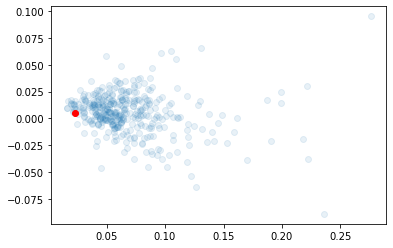

In [102]:
plt.scatter(df_summary_std.iloc[trimestre], df_summary.iloc[trimestre], alpha=0.1)
plt.scatter(df_summary_std["ewp_risk"].iloc[trimestre], df_summary["ewp_rendement"].iloc[trimestre], c="red")